In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile  as wavfile
import winsound, os
# plotting 3D complex plane
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal

### Lab 2 Question 1

#### a. State the convolution equation and discuss its application.

### Ans
The convolution equation is a mathematical operation that takes two signals, one being the input signal and the other being a system impulse response, and produces a third signal, the output signal. 

It is defined as: 

$$
y[n] = x[n] * h [n] = \sum_{k=-\infty}^{\infty}x[n]h[n-k]
$$

where x(t) is the input signal, h(t) is the impulse response of the system, y(t) is the output signal, and * denotes the convolution operator.


The application can decompose a signal into a series of scaled and time-shifted impulses, we can deduce the output response by combining the impulse response of each of the impulses

#### b. What happens to a pure sinusoid when it is passes through an LTI system? 
What does
Eigen function of an LTI system mean? Hint – read [7].

Generate 𝑥􁈾𝑛􁈿 􀵌 1 ∗ cos 􁈺0.1𝜋 𝑛􁈻 for 5 cycles of the signal. Convolve this signal

with ℎ􁈾𝑛􁈿 􀵌 􁈼0.2,0.3, 􀵆0.5􁈽, n = 0,1,2. Plot the input and output signal together on

the same graph, and comment on their relationship.

Hint python implementation:
h = np.array([0.2,0.3,-0.5])

The output waveform is also a sinusoid, but its amplitude and phase may be different from the input. The LTI system will change the amplitude, phase and/or frequency of the input signal.


Eigen Function of an LTI System means that the signal passing through the system will experience a change in phase and amplitude. There are no changes in frequency

In [270]:
def Question1b():
    h_n = np.array([0 for _ in range(50)] + [0.4,0.2,0.3] + [0 for _ in range(47)],dtype='float')
    n = np.arange(-50,50,1)
    x_n = 1*np.cos(0.1*np.pi*n)
    
    print(h_n)
    print(x_n)
    
    
    for j in range(0,50):
        x_n[j] = 0
    y_n = np.convolve(x_n,h_n)
    
    print(y_n)
    plt.figure(1,figsize=(30,20))
    plt.subplot(211)
    plt.stem(n,x_n,use_line_collection=True,basefmt="b",linefmt='y')
    plt.stem(n,h_n,use_line_collection=True,basefmt="b",linefmt='r')
    plt.subplot(212)
    plt.stem(n,y_n[50:150],use_line_collection=True,basefmt="b",linefmt='g')   
    plt.show()

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.2 0.3 0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[-1.00000000e+00 -9.51056516e-01 -8.09016994e-01 -5.87785252e-01
 -3.09016994e-01  5.51091060e-16  3.09016994e-01  5.87785252e-01
  8.09016994e-01  9.51056516e-01  1.00000000e+00  9.51056516e-01
  8.09016994e-01  5.87785252e-01  3.09016994e-01 -4.28626380e-16
 -3.09016994e-01 -5.87785252e-01 -8.09016994e-01 -9.51056516e-01
 -1.00000000e+00 -9.51056516e-01 -8.09016994e-01 -5.87785252e-01
 -3.09016994e-01  3.06161700e-16  3.09016994e-01  5.87785252e-01
  8.09016994e-01  9.51056516e-01  1.00000000e+00  9.51056516e-01
  8.09016994e-01  5.87785252e-01  3.09016994e-01 -1.83697020e-16
 -3.09016994e

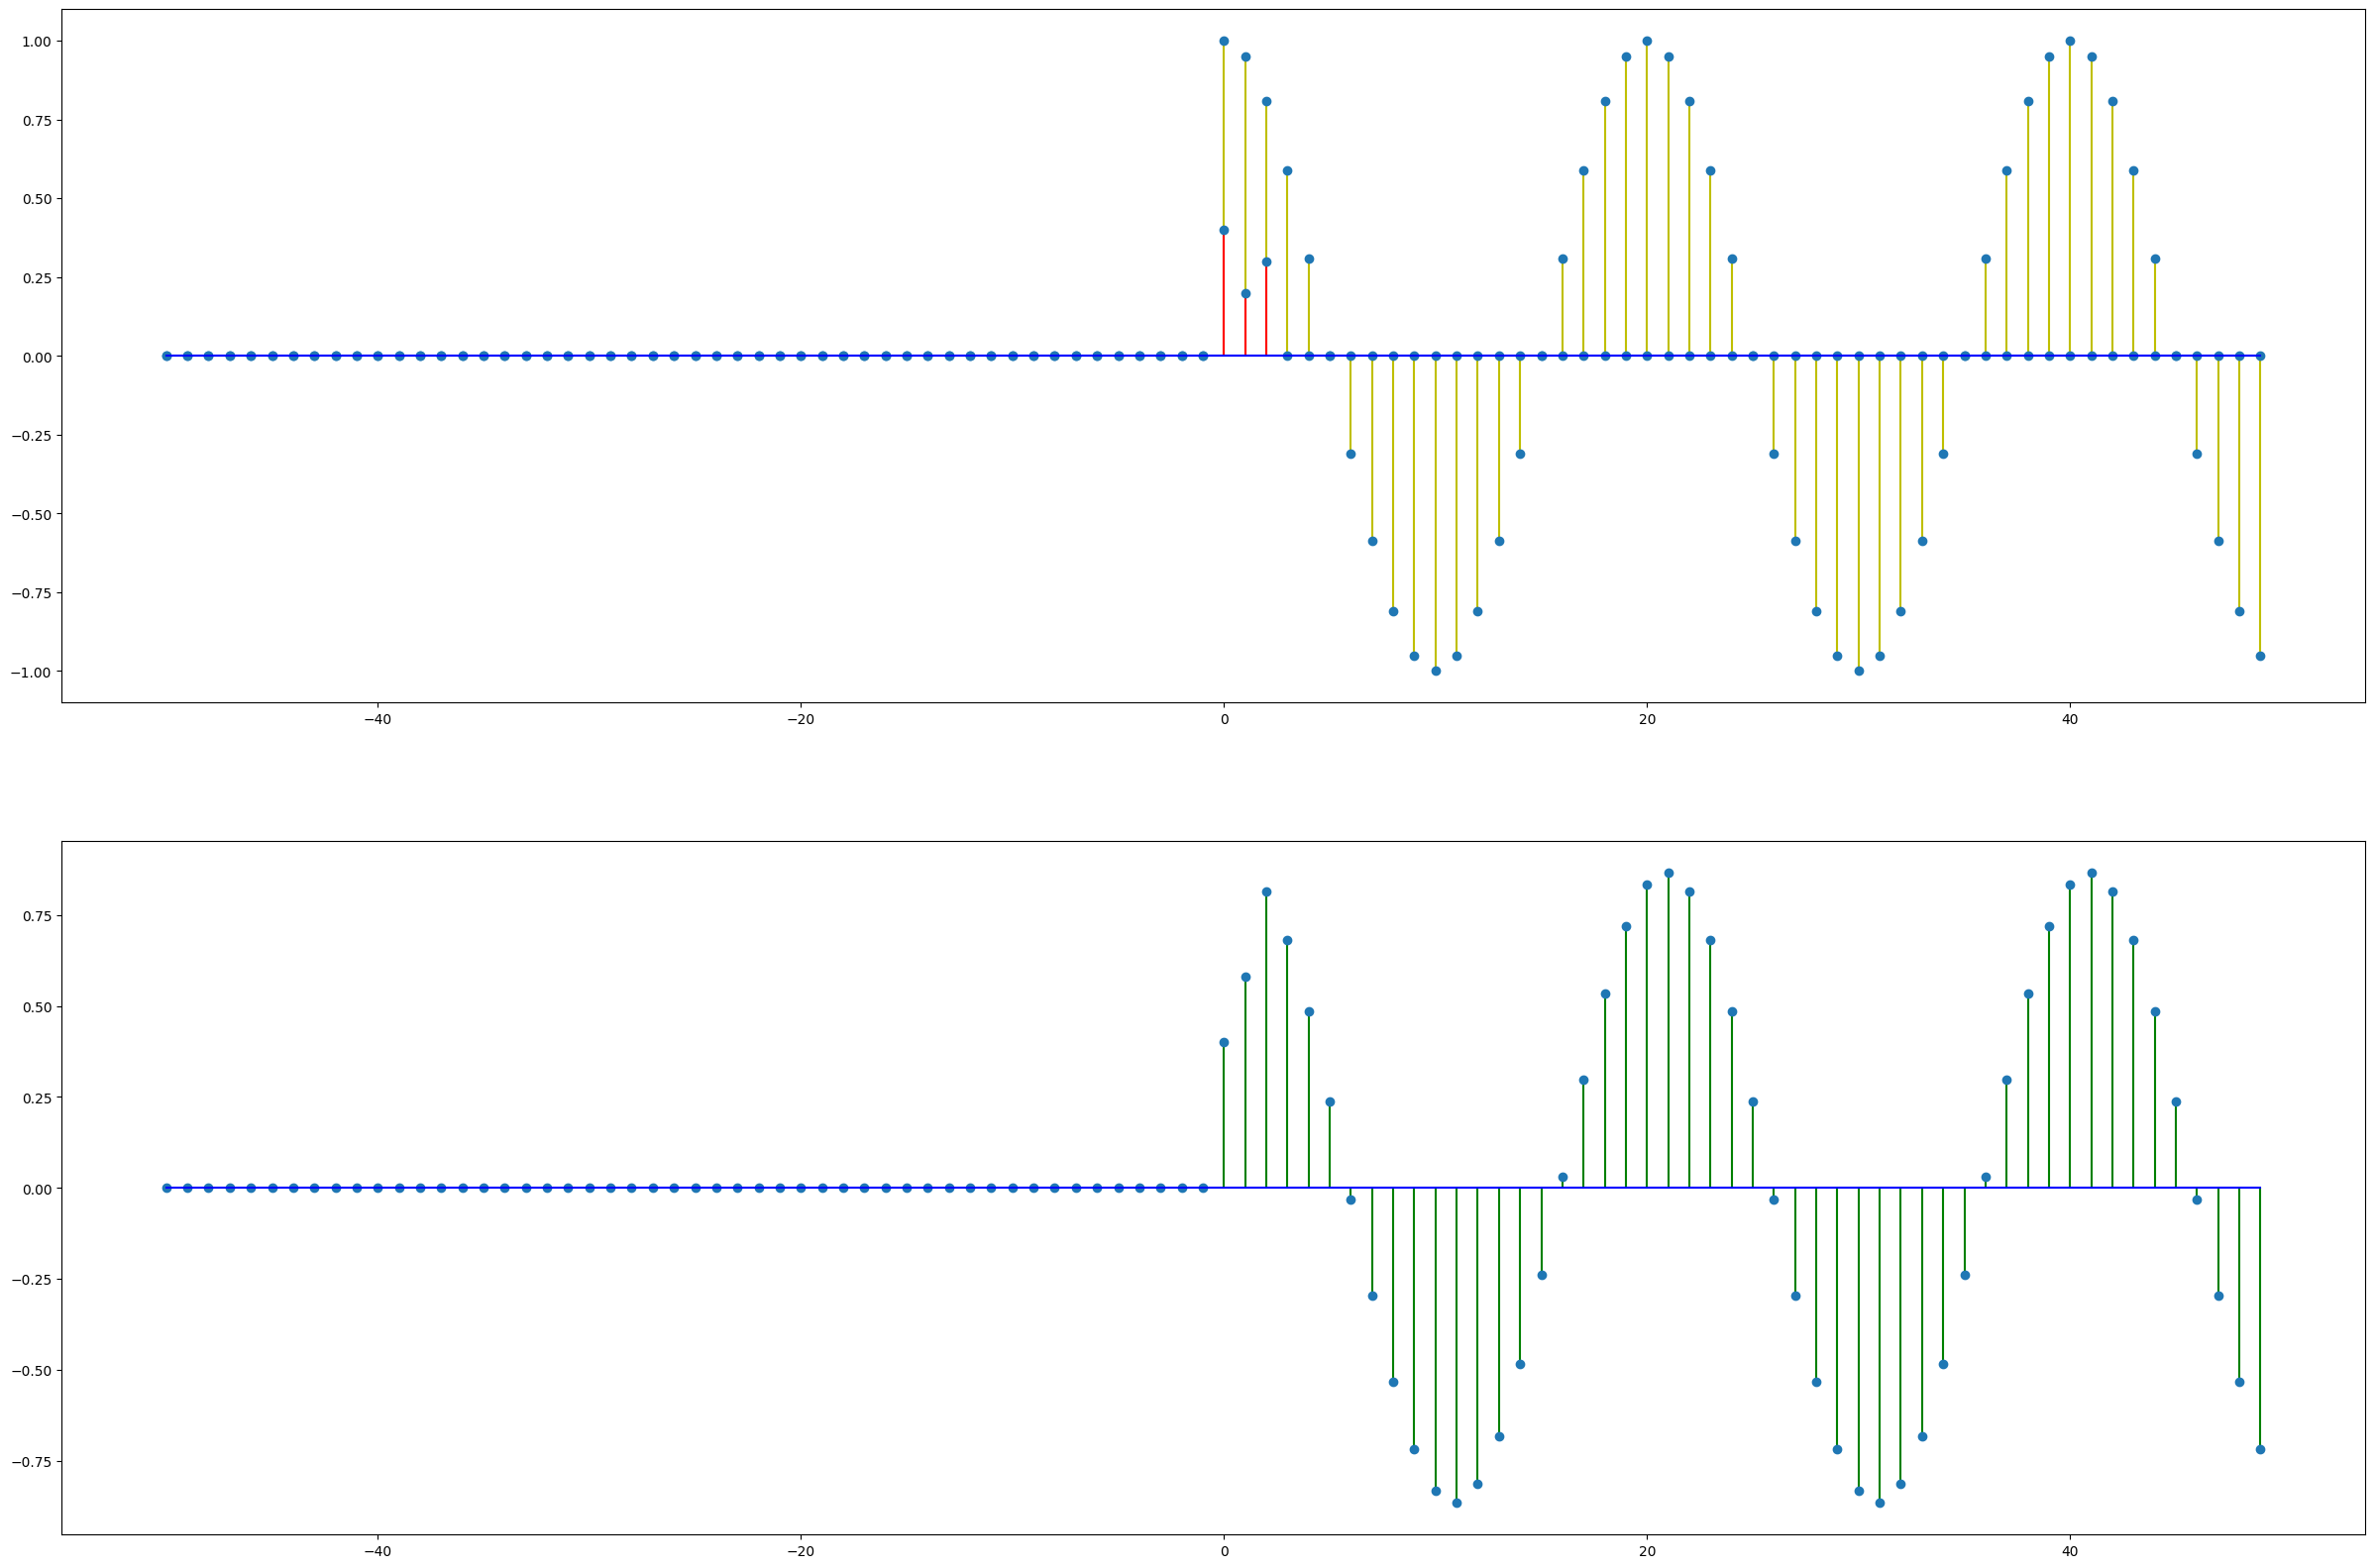

In [274]:
Question1b()

### Lab 2 Question 2

### The convolution equation and the linear constant coefficient difference equation are related in that they both describe the response of an LTI system to an input signal.

### Ans
The convolution equation describes the output signal as the convolution of the input signal with the impulse response of the system, while the linear constant coefficient difference equation describes the output signal as a linear combination of previous values of the input signal and previous values of the output signal.


Finite Impulse Response (FIR) system is an LTI system whose impulse response has a finite duration. The coefficients of the difference equation are determined by the impulse response coefficients. For example, if the impulse response of an FIR system is h[n] = [h0, h1, h2, ..., hN-1], then the difference equation for the output y[n] can be expressed as: y[n] = h0x[n] + h1x[n-1] + h2x[n-2] + ... + hN-1x[n-N+1].

### Lab 2 Question 3

### 3. You are given an input wave file (testIp_16bit.wav) which is a 16KHz-16bit sampled wave

file and an LTI system with impulse response defined by

impulseH = np.zeros(8000)

impulseH[1] = 1

impulseH[4000] = 0.5

impulseH[7900] = 0.3

The above impulse response typifies an echo filter [1]. This is different to room impulse response which is not as sparse, see [2].

### a. Sketch the impulse response. Write your own routine to generate the output y[n] by convolving the input wave file sequence with the given system. You can check the correctness of your implementation by comparing it against numpy’s convolve function[8] output to ensure correctness.

In [352]:
#Play the sound
input_wavfile = "helloWorld_16bit.wav"
winsound.PlaySound(input_wavfile, winsound.SND_FILENAME)

In [353]:
def extract_data_from_wav(wav_filename):
    # Load the WAV file
    [fs, data] = wavfile.read(wav_filename)   
    
    # Return the sample rate and data as a tuple
    return [fs, data]

In [354]:
def plot_wave_and_spectrogram(wav_filename):
    # Load the WAV file
    [fs, data] = extract_data_from_wav(wav_filename) 
    plt.figure(figsize=(30,10))
    plt.subplot(121)
    plt.plot(data,'r')
    plt.ylabel('signal (float)')
    plt.xlabel('sample n')
    
    freqs, times, spectrogram = signal.spectrogram(data, fs)
    plt.subplot(122)
    # Plot the spectrogram
    plt.pcolormesh(times, freqs, 10*np.log10(spectrogram),cmap='plasma')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Spectrogram')
    plt.show()

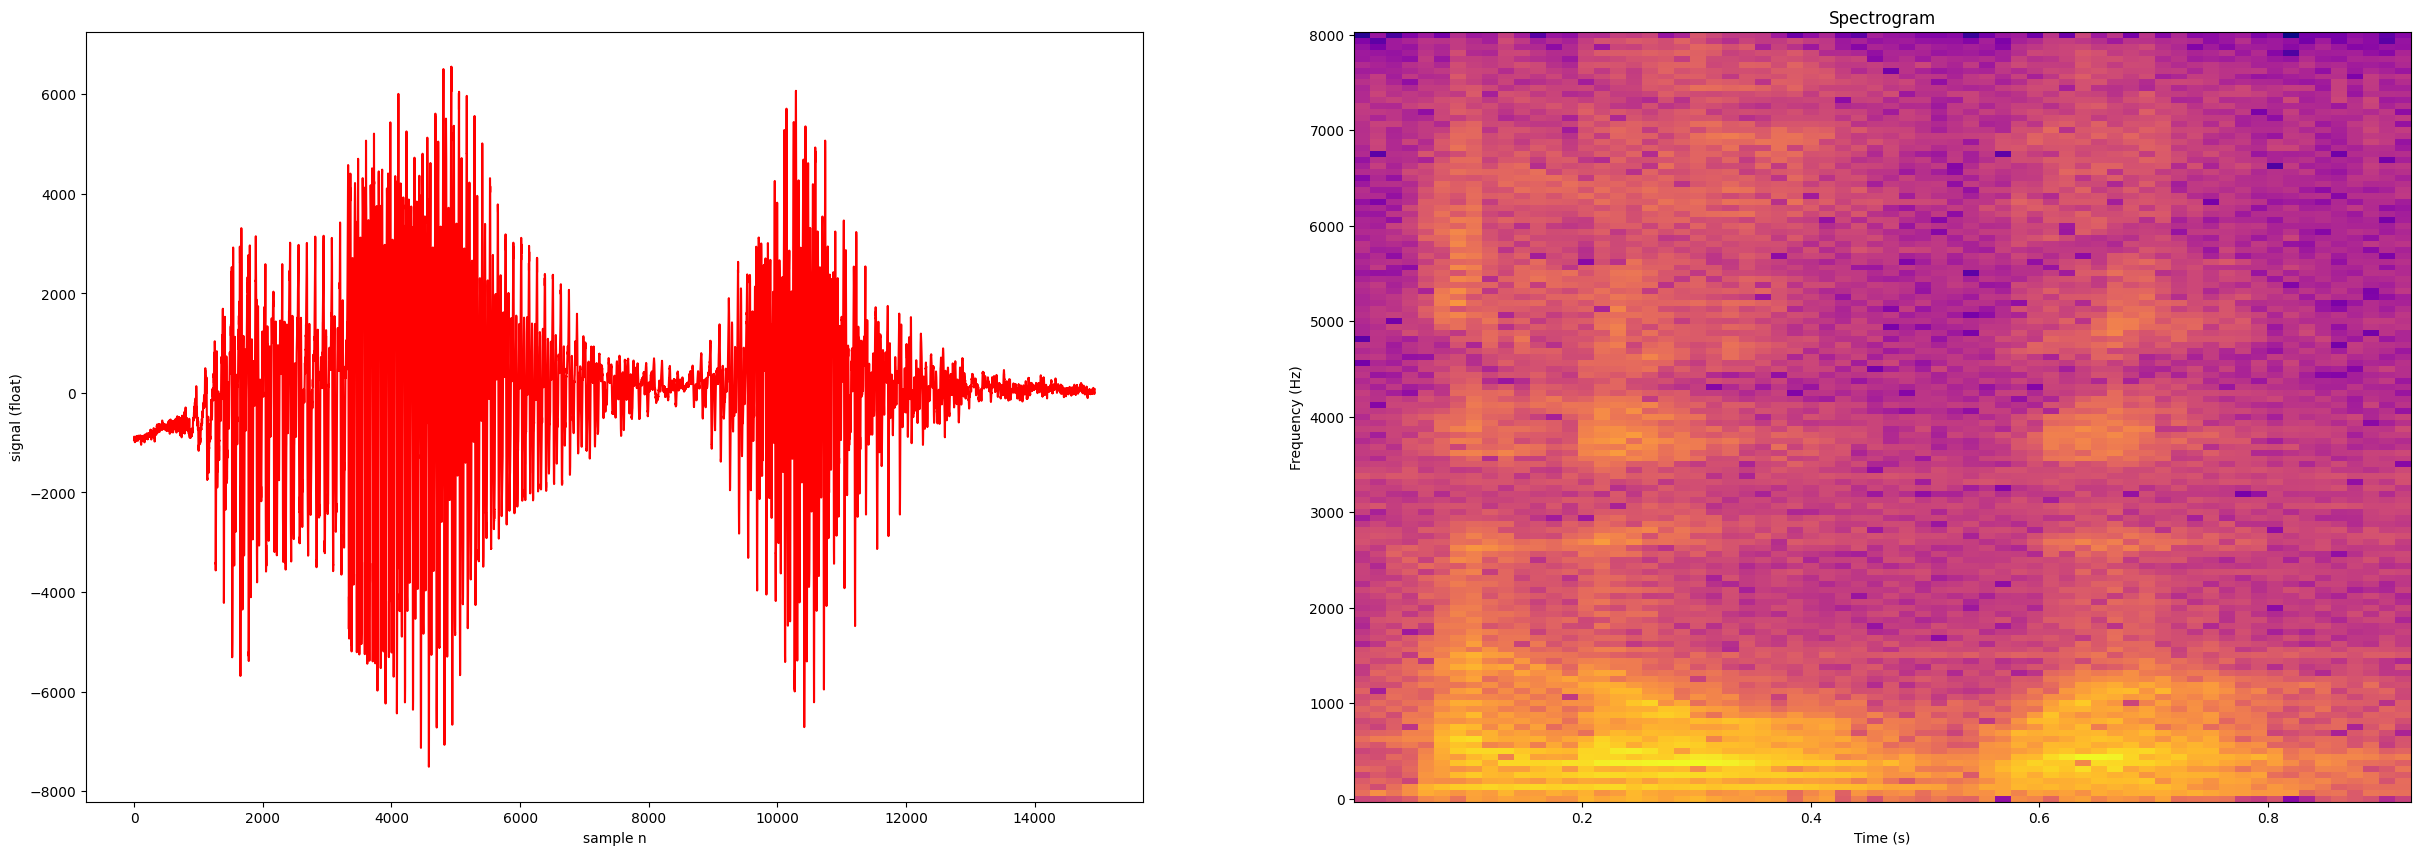

In [355]:
plot_wave_and_spectrogram("helloWorld_16bit.wav")

In [357]:
[fs, data] = extract_data_from_wav("helloWorld_16bit.wav")
sample_size = len(data)
impulseH = np.zeros(sample_size)
impulseH[1] = 1
impulseH[4000] = 0.5
impulseH[7900] = 0.3

### b. Save y[n] as a wave file (16KHz, 16bits) and listen to it. What did the filter do to the input wave file? Explore the effects of the system on the given input by setting different values to impulseH.

### c. Convolution is an expensive process. Is there a simpler way to generate the output? Hint – since most of impulse values are zero.

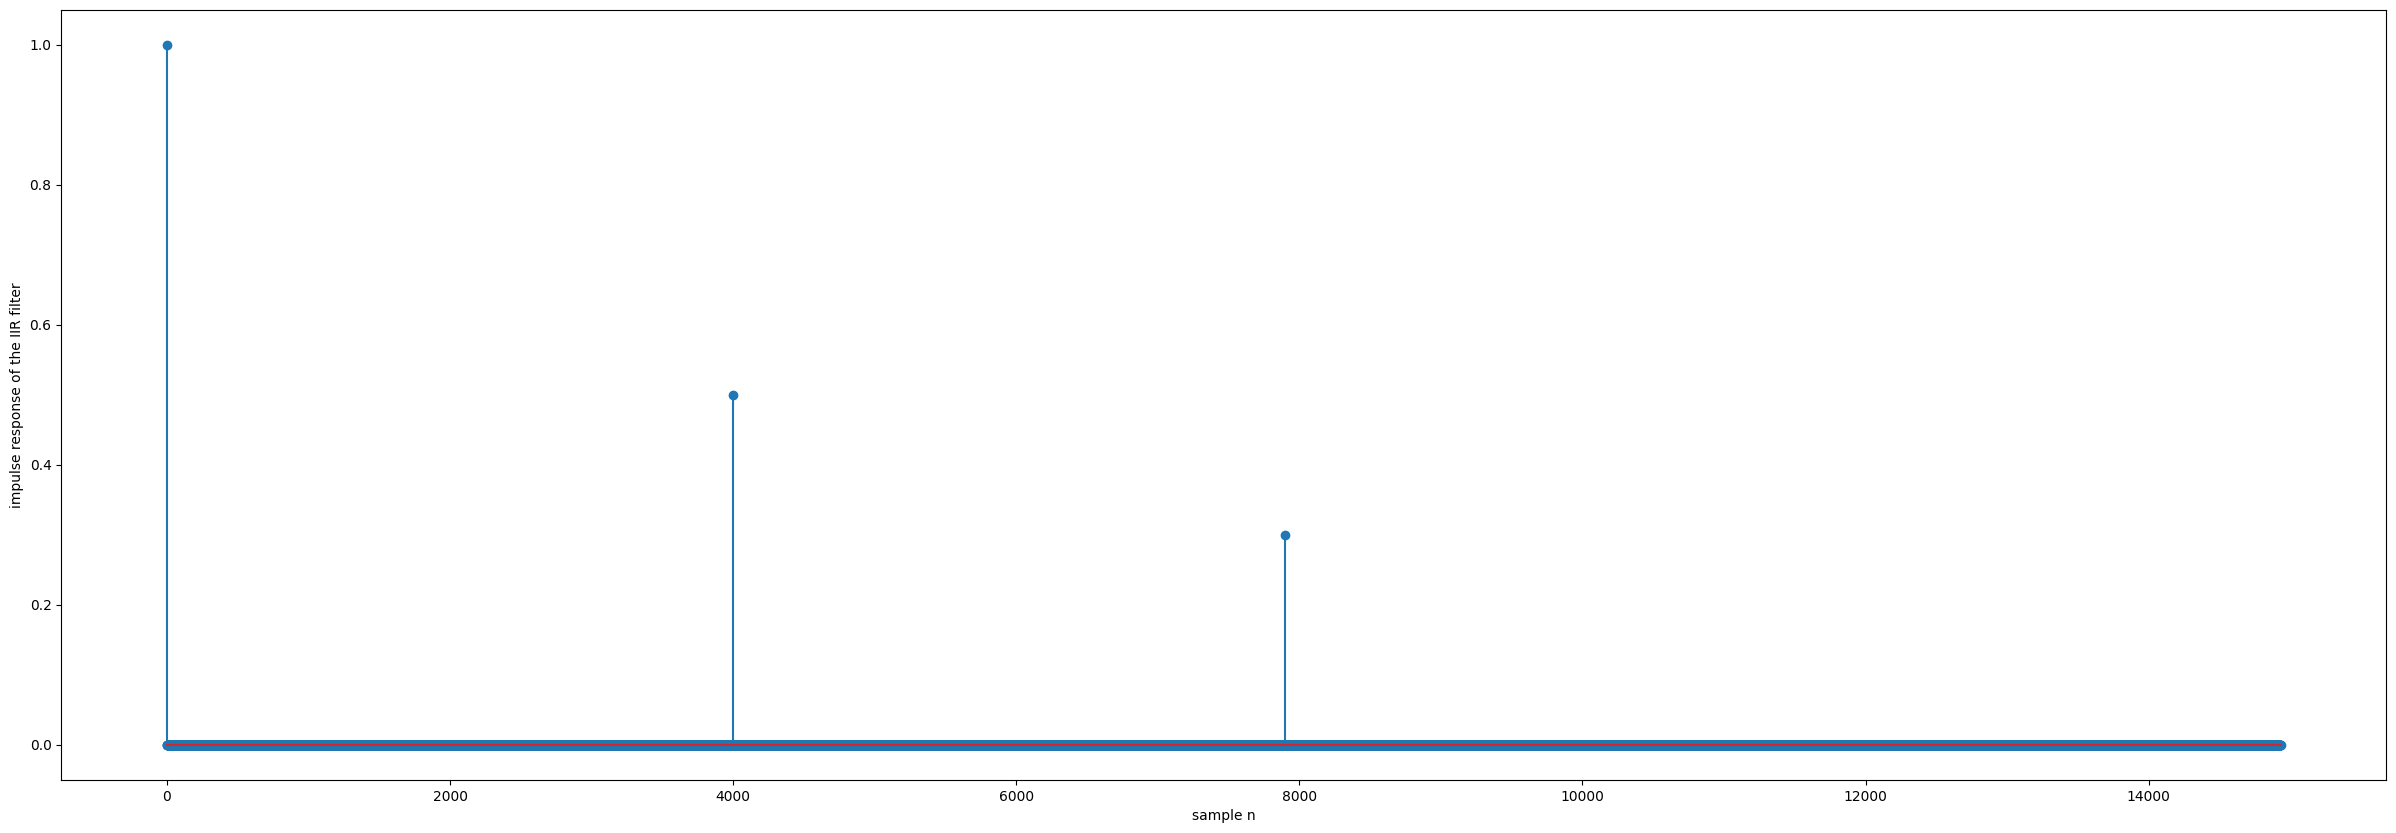

In [360]:
plt.figure(2,figsize=(30,10))
plt.stem(impulseH,use_line_collection=True)
plt.ylabel('impulse response of the IIR filter')
plt.xlabel('sample n')
plt.show()